# 1. Предобработка


Выберите набор данных из списка в конце задания. Обработайте данные в нём:

1. Обработайте недостающие данные в датасете - удалить/заменить/etc, обоснуйте своё решение
1. Постройте как минимум по 1 графику каждого типа из представленных на лекции. Для каждого построенного графика объясните почему отображённые данные лучше всего представимы именно этим типом графика
1. Сохраните датасет


1. Создайте новую колонку, отображающую характеристику набора данных. Новая колонка должна обладать смысловой нагрузкой. 

    Например, для набора данных о прямоугольниках с двумя колонками width и height будет корректно придумать колонку perimeter или area, равную width * height. Некорректно будет придумать колонку width2, равную width * 2, потому что эта информация не будет нести полезную информацию о фигурах

Не оценивается баллами, но даёт очки уважения:
1. Выдвиньте 2 гипотезы о данных. Например, для датасета codeforces достаточно интересной гипотезой может быть "простые задачи (рейтинг меньше 1500) почти всегда решаются больше 5000 раз"


Наборы данных:

1. [Spotify Tracks DB](https://www.kaggle.com/zaheenhamidani/ultimate-spotify-tracks-db) - характеристики треков в spotify
1. [VKontakte Dataset of Users' Textual Data](https://www.kaggle.com/oldaandozerskaya/vkontakte-dataset-of-users-textual-data) 1. основная информация 10к профилей ВК
1. [Data Science for COVID-19](https://www.kaggle.com/kimjihoo/coronavirusdataset) - информация о распространении коронавируса в Южной Корее в 2020 году
1. [Dota 2 - Pro Players Matches Results 2019 ~ 2021](https://www.kaggle.com/devinanzelmo/dota-2-matches?select=player_ratings.csv) - информация матчей игроков DoTA 2. Если данные не влезают в память, можно воспользоваться [аналогом pandas](https://dask.org/) для обработки вне RAM
1. [GPS Data of Seabirds](https://www.kaggle.com/saurabhshahane/predicting-animal-behavior-using-gps) - данные о миграции птиц
1. [FAANG Historical Stock Price Data](https://www.kaggle.com/specter7/amazon-amzn-historical-stock-price-data) -  данные о биржевых котировках компаний FAANG c 2016 по 2021 год
1. [NBA 2k20 player dataset](https://www.kaggle.com/isaienkov/nba2k20-player-dataset) - информация об игроках NBA
1. [Anime dataset](https://www.kaggle.com/thunderz/anime-dataset?select=user_data.csv) - данные о просмотре аниме пользователями с сайта myAnimeList

In [1]:
import pandas as pd
import numpy as np

In [2]:
file_name = "SpotifyFeatures.csv"

In [3]:
data = pd.read_csv(file_name)
data.head(5)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [5]:
data.sort_values(by = ['popularity'], ascending=False).head(3)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
9027,Dance,Ariana Grande,7 rings,14msK75pk3pA33pzPVNtBF,100,0.578,0.725,178640,0.321,0.000000,C#,0.0884,-10.744,Minor,0.323,70.142,4/4,0.319
107804,Pop,Ariana Grande,7 rings,14msK75pk3pA33pzPVNtBF,100,0.578,0.725,178640,0.321,0.000000,C#,0.0884,-10.744,Minor,0.323,70.142,4/4,0.319
86951,Rap,Post Malone,Wow.,6MWtB6iiXyIwun0YzU6DFP,99,0.163,0.833,149520,0.539,0.000002,B,0.1010,-7.399,Minor,0.178,99.947,4/4,0.385


In [6]:
# 1 task
# Dastaset doesn't have missing data.
percent = np.count_nonzero(data.instrumentalness)/data.size
print(f"Percent of nonzero values in \"instrumentalness\": {percent:.0%}")

Percent of nonzero values in "instrumentalness": 4%


Не очень осмысленный столбец, можно просто от него избавиться.

In [7]:
data.drop("instrumentalness", inplace = True, axis = 1)

Ещё для ведения статистики очень мешает столбец жанра. Его надо будет как-то переформулировать, если мы захотим нормально собирать статистику.

In [8]:
data.drop("genre", inplace = True, axis = 1)
data.drop_duplicates(inplace = True)

In [9]:
data.head(10)

,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.61100,0.389,99373,0.9100,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.24600,0.590,137373,0.7370,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.95200,0.663,170267,0.1310,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.70300,0.240,152427,0.3260,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.95000,0.331,82625,0.2250,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390
5,Henri Salvador,Le petit souper aux chandelles,0Mf1jKa8eNAf1a4PwTbizj,0,0.74900,0.578,160627,0.0948,C#,0.1070,-14.970,Major,0.1430,87.479,4/4,0.358
6,Martin & les fées,"Premières recherches (par Paul Ventimila, Lori...",0NUiKYRd6jt1LKMYGkUdnZ,2,0.34400,0.703,212293,0.2700,C#,0.1050,-12.675,Major,0.9530,82.873,4/4,0.533
7,Laura Mayne,Let Me Let Go,0PbIF9YVD505GutwotpB5C,15,0.93900,0.416,240067,0.2690,F#,0.1130,-8.949,Major,0.0286,96.827,4/4,0.274
8,Chorus,Helka,0ST6uPfvaPpJLtQwhE6KfC,0,0.00104,0.734,226200,0.4810,C,0.0765,-7.725,Major,0.0460,125.080,4/4,0.765
9,Le Club des Juniors,Les bisous des bisounours,0VSqZ3KStsjcfERGdcWpFO,10,0.31900,0.598,152694,0.7050,G,0.3490,-7.790,Major,0.0281,137.496,4/4,0.718


In [10]:
# 2 task
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2064: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


(0, 10)

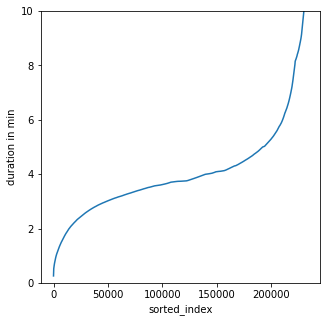

In [36]:
#plot - что-то непрерывное
#Честный 0 непрерывной информации.
plt.plot(data.index, data.sort_values(by = ['duration_ms']).duration_ms/60000)
plt.xlabel('sorted_index')
plt.ylabel('duration in min')
plt.ylim((0, 10))

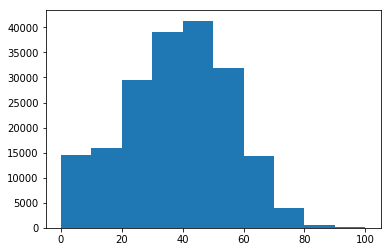

In [12]:
#hist - распределение
plt.hist(data.popularity)
plt.show()

Распределение очень похоже на нормальное.

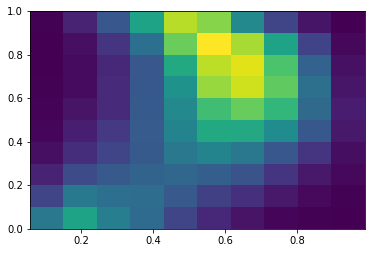

In [13]:
#hist2d
plt.hist2d(data.danceability, data.energy)
plt.show()

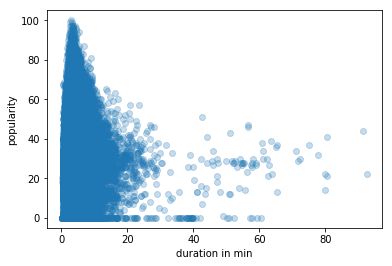

In [14]:
#scatter - как распределены объекты относительно двух признаков
plt.scatter(data.duration_ms/60000, data.popularity, alpha = 0.25)
plt.rcParams["figure.figsize"] = (15, 10)
plt.ylabel('popularity')
plt.xlabel('duration in min')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2082: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


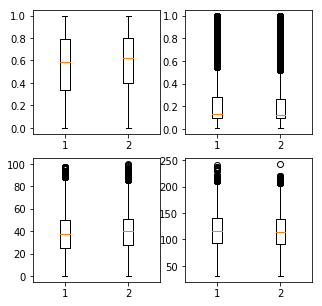

In [15]:
#boxplot - распределение
plt.rcParams["figure.figsize"] = (5, 5)
fig, axs = plt.subplots(2, 2)
params = [['energy', 'liveness'], ['popularity', 'tempo']]
major = data[data['mode'] == 'Major']
minor = data[data['mode'] == 'Minor']
def boxplot(x, y):
    param = params[x][y]
    axs[x, y].boxplot([major[param], minor[param]], )
boxplot(0,0)
boxplot(0,1)
boxplot(1,0)
boxplot(1,1)
plt.show()

In [16]:
# 4 task
# Adding karaoke column. Song is greate for karaoke, if it is popular and has a big speechiness.
max_popularity = data.popularity.max()
def toKaraokiness(data: pd.Series, max_popularity: int) -> pd.Series:
    return (data.speechiness**2 + 3*(data.popularity / max_popularity)**2 + data.danceability**2 + data.valence**2).pow(1/2)
dataWithKaraoke = data.assign(karaokiness = data.pipe(toKaraokiness, max_popularity))
dataWithKaraoke.head(5)

,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,karaokiness
0,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814,0.903700
1,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816,1.010836
2,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368,0.760923
3,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227,0.332700
4,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390,0.518209


In [17]:
max_karaokiness = dataWithKaraoke.karaokiness.idxmax()
dataWithKaraoke.sort_values(by = ['karaokiness'], ascending=False).head(5)

,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,karaokiness
107816,Jonas Brothers,Sucker,4y3OI86AEP6PQoDE6olYhO,94,0.0436,0.846,181040,0.731,C#,0.0949,-5.027,Minor,0.0640,137.947,4/4,0.933,2.059393
86953,Post Malone,Sunflower - Spider-Man: Into the Spider-Verse,3KkXRkHbMCARz0aVfEt68P,97,0.5560,0.760,158040,0.479,D,0.0703,-5.574,Major,0.0466,89.911,4/4,0.913,2.058164
107875,Pedro Capó,Calma - Remix,5iwz1NiezX7WWjnCgY5TH4,97,0.3230,0.826,238200,0.773,B,0.1430,-4.218,Minor,0.0524,126.899,4/4,0.761,2.021594
9042,Jonas Brothers,Sucker,4y3OI86AEP6PQoDE6olYhO,91,0.0436,0.846,181040,0.731,C#,0.0949,-5.027,Minor,0.0640,137.947,4/4,0.933,2.018564
138922,Anuel Aa,Amanece,1LiN0Z98FkR1t0m8KmLcAH,92,0.4370,0.790,190005,0.631,G#,0.1580,-5.549,Minor,0.0425,94.039,4/4,0.889,1.988826


# 2. Интерполяция кривой

Сгенерируйте от 5 до 20 точек со случайными разными координатами (x, y), расположите их на координатной плоскости

1. С помощью библиотеки scipy примените один из её [алгоритмов интерполяции](https://docs.scipy.org/doc/scipy/reference/interpolate.html) к сгенерированным данным
1. Изучите математический подход метод выбранного алгоритма интерполяции в scipy. Найдите и продемонстрируйте при сдаче реализацию метода в исходном коде библиотеки scipy. Найти можно в [github репозитории проекта](https://github.com/scipy/scipy)
1. Выберите среди методов интерполяции в scipy любой другой метод интерполяции (кроме линейной интерполяций). Реализуйте выбранный метод без использования сторонних библиотек. Разрешается использовать numpy для упрощения математичеких вычислений
1. Визуализируйте кривую интерполяции библиотечного и вашего алгоритмов с помощью  matplotlib. Сравните качество интерполяции своего и библиотечного методов, объясните разницу в качестве

In [18]:
import numpy.random as rnd
cnt = 10
rng = 100
x = rnd.rand(cnt) * rng
y = rnd.rand(cnt) * rng
x, y

(array([79.98667382, 37.9835661 , 43.23585198, 23.8833588 , 96.93979966,
        35.27737994, 83.87598558, 11.61751476, 68.14325498, 76.53959783]),
 array([40.07018628, 96.84750533, 70.16147759, 37.26764741, 54.90302136,
        83.62639316, 60.94775345, 40.67016591, 71.90157486, 88.97434833]))

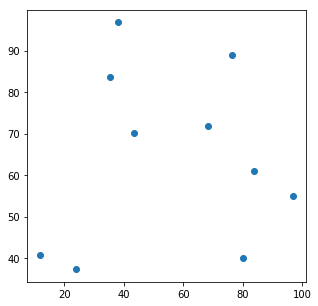

In [19]:
plt.scatter(x, y)

## Barycentric Interpolator

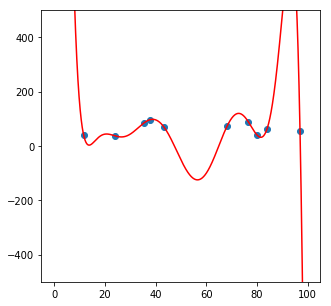

In [20]:
# 1 task
import scipy as sc
import scipy.interpolate as inter
x_test = np.arange(0, 100, 0.005)
y_test = inter.barycentric_interpolate(xi = x, yi = y, x = x_test)
#print(x_test)
#y_test = func(x_test)
plt.scatter(x, y)
plt.ylim((-500,500))
plt.plot(x_test, y_test, color = "red")

# 2 task

class BarycentricInterpolator(_Interpolator1D)

    def __init__(self, xi, yi=None, axis=0):
        _Interpolator1D.__init__(self, xi, yi, axis)

        self.xi = np.asfarray(xi)
        self.set_yi(yi)
        self.n = len(self.xi)
        self._inv_capacity = 4.0 / (np.max(self.xi) - np.min(self.xi))
        permute = np.random.permutation(self.n)
        inv_permute = np.zeros(self.n, dtype=np.int32)
        inv_permute[permute] = np.arange(self.n)

        self.wi = np.zeros(self.n)
        for i in range(self.n):
            dist = self._inv_capacity * (self.xi[i] - self.xi[permute])
            dist[inv_permute[i]] = 1.0
            self.wi[i] = 1.0 / np.prod(dist)

    def set_yi(self, yi, axis=None):
        if yi is None:
            self.yi = None
            return
        self._set_yi(yi, xi=self.xi, axis=axis)
        self.yi = self._reshape_yi(yi)
        self.n, self.r = self.yi.shape

    def add_xi(self, xi, yi=None):
        if yi is not None:
            if self.yi is None:
                raise ValueError("No previous yi value to update!")
            yi = self._reshape_yi(yi, check=True)
            self.yi = np.vstack((self.yi,yi))
        else:
            if self.yi is not None:
                raise ValueError("No update to yi provided!")
        old_n = self.n
        self.xi = np.concatenate((self.xi,xi))
        self.n = len(self.xi)
        self.wi **= -1
        old_wi = self.wi
        self.wi = np.zeros(self.n)
        self.wi[:old_n] = old_wi
        for j in range(old_n, self.n):
            self.wi[:j] *= self._inv_capacity * (self.xi[j]-self.xi[:j])
            self.wi[j] = np.multiply.reduce(
                self._inv_capacity * (self.xi[:j]-self.xi[j])
            )
        self.wi **= -1

    def __call__(self, x):
        return _Interpolator1D.__call__(self, x)

    def _evaluate(self, x):
        if x.size == 0:
            p = np.zeros((0, self.r), dtype=self.dtype)
        else:
            c = x[..., np.newaxis] - self.xi
            z = c == 0
            c[z] = 1
            c = self.wi/c
            with np.errstate(divide='ignore'):
                p = np.dot(c, self.yi) / np.sum(c, axis=-1)[..., np.newaxis]
            # Now fix where x==some xi
            r = np.nonzero(z)
            if len(r) == 1:  # evaluation at a scalar
                if len(r[0]) > 0:  # equals one of the points
                    p = self.yi[r[0][0]]
            else:
                p[r[:-1]] = self.yi[r[-1]]
        return p

class _Interpolator1D:

    __slots__ = ('_y_axis', '_y_extra_shape', 'dtype')

    def __init__(self, xi=None, yi=None, axis=None):
        self._y_axis = axis
        self._y_extra_shape = None
        self.dtype = None
        if yi is not None:
            self._set_yi(yi, xi=xi, axis=axis)

    def __call__(self, x):
        x, x_shape = self._prepare_x(x)
        y = self._evaluate(x)
        return self._finish_y(y, x_shape)

    def _evaluate(self, x):
        raise NotImplementedError()

    def _prepare_x(self, x):
        """Reshape input x array to 1-D"""
        x = _asarray_validated(x, check_finite=False, as_inexact=True)
        x_shape = x.shape
        return x.ravel(), x_shape

    def _finish_y(self, y, x_shape):
        """Reshape interpolated y back to an N-D array similar to initial y"""
        y = y.reshape(x_shape + self._y_extra_shape)
        if self._y_axis != 0 and x_shape != ():
            nx = len(x_shape)
            ny = len(self._y_extra_shape)
            s = (list(range(nx, nx + self._y_axis))
                 + list(range(nx)) + list(range(nx+self._y_axis, nx+ny)))
            y = y.transpose(s)
        return y

    def _reshape_yi(self, yi, check=False):
        yi = np.moveaxis(np.asarray(yi), self._y_axis, 0)
        if check and yi.shape[1:] != self._y_extra_shape:
            ok_shape = "%r + (N,) + %r" % (self._y_extra_shape[-self._y_axis:],
                                           self._y_extra_shape[:-self._y_axis])
            raise ValueError("Data must be of shape %s" % ok_shape)
        return yi.reshape((yi.shape[0], -1))

    def _set_yi(self, yi, xi=None, axis=None):
        if axis is None:
            axis = self._y_axis
        if axis is None:
            raise ValueError("no interpolation axis specified")

        yi = np.asarray(yi)

        shape = yi.shape
        if shape == ():
            shape = (1,)
        if xi is not None and shape[axis] != len(xi):
            raise ValueError("x and y arrays must be equal in length along "
                             "interpolation axis.")

        self._y_axis = (axis % yi.ndim)
        self._y_extra_shape = yi.shape[:self._y_axis]+yi.shape[self._y_axis+1:]
        self.dtype = None
        self._set_dtype(yi.dtype)

    def _set_dtype(self, dtype, union=False):
        if np.issubdtype(dtype, np.complexfloating) \
               or np.issubdtype(self.dtype, np.complexfloating):
            self.dtype = np.complex_
        else:
            if not union or self.dtype != np.complex_:
                self.dtype = np.float_

## Lagrange Interpolator

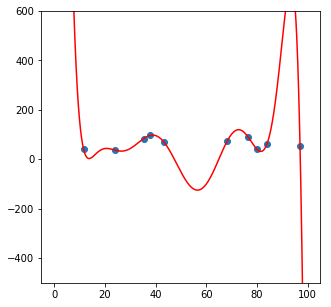

In [35]:
# 3 task
from numpy import poly1d
def LagrangePoly(xi, yi):
    p = np.poly1d(0.0)
    size = len(xi)
    for j in range(size):
        curr = poly1d(yi[j])
        for k in range(size):
            if k == j:
                continue
            curr *= poly1d([1.0, -xi[k]])/(xi[j]-xi[k])
        p += curr
    return p
def lagrange_interpolate(xi, yi, x):
    return LagrangePoly(xi, yi)(x)
poly = LagrangePoly(x, y)
y_test = poly(x_test)
plt.scatter(x, y)
plt.ylim((-500,600))
plt.plot(x_test, y_test, color = "red")

# 3. Быстрая гистограмма

Иногда хочется получить дискретное распределение из N колонок. Но пока что для этого у нас есть только plt.hist(), которая тратит много времени на отрисовку графика. Вам предлагается реализовать свою функцию построения дискретного распределения

1. Алгоритм должен получать на вход список чисел и количество колонок гистограммы. Возвращать нужно значения столбцов (ось абсцисс гистограммы) и количество значений, принадлежащее столбцу (ось ординат гистограммы). Пример с использованием plt показан ниже, сигнатура функции также показана ниже
1. Изучите функцию [plt.bar](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html). Это такая же гистограмма как plt.hist, но в отличие от hist требуется явно указывать высоту колонок и их название
1. С помощью результатов своего алгоритма и plt.bar постройте гистограмму по массиву из 50+ случайных чисел. Графики plt.bar по вашему алгоритму и plt.hist() должны совпадать, что подтвердит корректность работы вашего алгоритма
1. Сравните скорость построения распределения по массиву чисел с помощью своего алгоритма и с помощью plt.hist. В jupyter рекомендуется использовать built-in magic commands, а именно timeit. Но можно обойтись и ручными измерениями времени выполнения

Значения колонок: [3. 2. 2. 2.]
Названия колонок: [1.   1.75 2.5  3.25 4.  ]


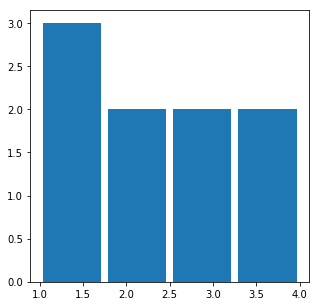

In [22]:
# Пример гистограммы с помощью plt.hist()
import matplotlib.pyplot as plt

array = [1,1,2,3,4,1,2,3,4]

value_counts, bins_names, visual_figure = plt.hist(array, 
                                                   bins=len(set(array)), 
                                                   rwidth=0.9)
# Параметр rwidth и визуализацию в своей функции реализовывать не требуется
print('Значения колонок:', value_counts)
print('Названия колонок:', bins_names)

In [23]:
from typing import List, Tuple, Union

def fast_hist(array: List[Union[int, float]], 
              bins: int) -> Tuple[List[int], List[float]]:
    """
    Builds bins' labels and bins' value counts for given array
    :param array: array with numeric values
    :param bins:  number of bins in result distribution
    :return: Two lists: 
             first contains value counts of each bin,
             second contains list of bins' labels
    """
    
    max_item = np.max(array)
    min_item = np.min(array)
    step = (max_item - min_item) / bins
    bins_names = np.linspace(min_item, max_item, bins+1, True)
    value_counts = [0] * (bins)
    for item in array:
        #print((int)((item-min_item) // step))
        if (item == max_item):
            value_counts[-1] += 1
        else:
            value_counts[(int)((item-min_item) // step)] += 1
    return (value_counts, bins_names)

[3, 2, 2, 2] [1.   1.75 2.5  3.25 4.  ]


<BarContainer object of 4 artists>

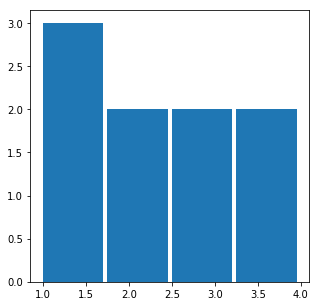

In [24]:
value_counts, bins_names = fast_hist(array, len(set(array)))
print(value_counts, bins_names)
plt.bar(bins_names[:-1], value_counts, align = "edge", width = 0.7)

In [25]:
import pandas as pd
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt

In [37]:
def compare(size = 50, low = 0, high = 10):
    test_array = rnd.rand(size) * (high - low) + low
    print(test_array)
    test_bins = 30
    print("plt.hist time")
    %timeit plt.hist(test_array, bins=test_bins)
    value_counts1, bins_names1, visual_figure = plt.hist(test_array, bins=test_bins, rwidth=0.9)
    #print("plt.hist result", value_counts1, bins_names1)
    print("my hist time")
    %timeit fast_hist(test_array, test_bins)
    value_counts2, bins_names2 = fast_hist(test_array, test_bins)
    #print("my hist result", value_counts2, bins_names2)
    comparing = np.array_equal(value_counts1, value_counts2) and np.array_equal(bins_names1, bins_names2)
    print("Hists are equal: ", comparing)
    plt.bar(bins_names2[:-1], value_counts2, align = "edge", width = 0.7)
    plt.show()
    

[6.96275979 1.80366429 0.65808728 4.18644134 9.09968831 8.96551655
 0.97531561 6.86817726 3.50569635 1.45016522 4.10334659 5.77714936
 0.78217163 5.79438957 2.00343438 8.94504986 9.23959391 8.96464197
 3.78813488 0.81633022 9.38787922 3.27254876 1.26881538 1.52994724
 1.93909481 7.29162329 6.0773272  9.85834508 7.6108189  6.44265941
 7.39172624 5.00549291 2.86553347 1.81824504 3.90711058 6.09312932
 6.34446277 4.97680546 5.29407635 9.00181387 2.63098067 3.30646534
 8.08256894 8.19535069 5.89624849 7.07189897 5.07001917 7.11794024
 3.89341748 9.7708083 ]
plt.hist time
73 ms ± 15.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
my hist time
222 µs ± 14.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Hists are equal:  True


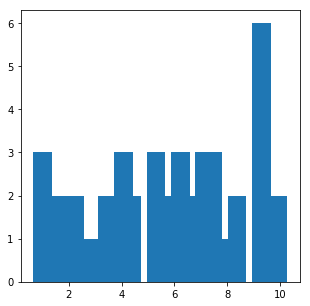

In [38]:
compare()